This project aims to collect and analyze the data analyst related job listings on the linkedIn so that some common job requirements are revealed, which will be used to help job candidates to better prepare for job hunts.

First of all, essential packages are imported so that we can use them at later stages

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

Then, we will need to get the data from linkedin first. For me, I want to find the data relevant jobs around McLean, you can add a lot of filters to your search including salary, distance, industry type and so on. after you enter your key words and apply your filters, copy the url to the following code block.

In [2]:
# my key word is data analyst, location is McLean, filters include distance less than 16 kms, and experience levels is one of the list ['Entry Level', 'internship', 'associate']
url = "https://www.linkedin.com/jobs/search/?currentJobId=3976163471&distance=10&f_E=1%2C2%2C3&geoId=106504367&keywords=data%20analyst&origin=JOB_SEARCH_PAGE_JOB_FILTER&refresh=true&spellCorrectionEnabled=true"

# Set up your LinkedIn credentials
USERNAME = 'hecheng050014@outlook.com'
PASSWORD = 'Hcfaw123,.123'

# Setup WebDriver 
driver = webdriver.Edge()

# Navigate to LinkedIn
driver.get('https://www.linkedin.com/login')

# Wait for the email input and fill it
email_input = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, 'username'))
)
email_input.send_keys(USERNAME)

# Wait for the password input and fill it
password_input = driver.find_element(By.ID, 'password')
password_input.send_keys(PASSWORD)

# Submit the login form
password_input.send_keys(Keys.RETURN)

# Wait until the login process is complete (check for some element on the homepage)
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, 'global-nav__me'))
)

# Log into LinkedIn manually or use Selenium to automate it.
driver.get(url)




Above code allows us to log in the linkedin, and then we will need to get the number of pages that we want to scrape

In [3]:
#there are 25 job listings on each page, i need to make a list of pages that contains all the job listings

#add the first page to the list
urls = [url]

#find out the number of job listings 
number_of_results = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, 'div.jobs-search-results-list__subtitle'))
).text.strip().split()[0]

#divde the number of job listings by 25 and then we have the number of pages
number_of_pages = int(number_of_results) // 25 + 1

#add the urls to the list
for i in range(1, number_of_pages):
    link = url + "&start=" + str(i*25)
    urls.append(link)

print('total number of pages: ', number_of_pages)


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: MicrosoftEdge=129.0.2792.79)
Stacktrace:
	GetHandleVerifier [0x00007FF6EFE9CEF5+12997]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF6F011BD24+1897988]
	(No symbol) [0x00007FF6EFC4F1CC]
	(No symbol) [0x00007FF6EFC2AB09]
	(No symbol) [0x00007FF6EFCBE83B]
	(No symbol) [0x00007FF6EFCD21DA]
	(No symbol) [0x00007FF6EFCB7BB3]
	(No symbol) [0x00007FF6EFC8B5AC]
	(No symbol) [0x00007FF6EFC8AA8D]
	(No symbol) [0x00007FF6EFC8B171]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF6F0049E04+1038052]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF6EFDC095F+56655]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF6EFDB3103+1267]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF6F0048B8D+1033325]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF6EFE39761+327729]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF6EFE35BE4+312500]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF6EFE35D19+312809]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF6EFE2C28C+273244]
	BaseThreadInitThunk [0x00007FFFA2A2257D+29]
	RtlUserThreadStart [0x00007FFFA466AF08+40]


Next, we have all the pages, and we will scrape each page to get each job listing's job description page link

In [10]:
#create a empty list to store the job links
jobs = []

counter = 1

print('total number of pages: ', len(urls))
print('estimated time: ' + str(len(urls)*2.5) + ' seconds')

#go through each page and scrape the job links
for i in urls:
    
    driver.get(i)
    
    # Wait for the job listings to load
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, 'ul.scaffold-layout__list-container'))
    )
    
    # Scrape job listings
    job_lists = driver.find_element(By.CSS_SELECTOR, 'ul.scaffold-layout__list-container').find_elements(By.CSS_SELECTOR, 'li.jobs-search-results__list-item')
        
    # Extract job information
    for job in job_lists:
        try:
            link = job.find_element(By.CSS_SELECTOR, 'a').get_attribute('href')
            jobs.append(link)
        except:
            pass
    
    print(f'Finished scraping page {counter}')
    counter += 1
    
print(f'total number of jobs scraped: {len(jobs)}')

total number of pages:  18
estimated time: 45.0 seconds
Finished scraping page 1
Finished scraping page 2
Finished scraping page 3
Finished scraping page 4
Finished scraping page 5
Finished scraping page 6
Finished scraping page 7
Finished scraping page 8
Finished scraping page 9
Finished scraping page 10
Finished scraping page 11
Finished scraping page 12
Finished scraping page 13
Finished scraping page 14
Finished scraping page 15
Finished scraping page 16
Finished scraping page 17
Finished scraping page 18
total number of jobs scraped: 126


Now i have already obtained all the job links, then next step i will scrape each website's job description and run a text analysis

In [11]:
#create a list to store the job description
job_descriptions = []

for i in range(len(jobs)):
    
    print(f'Finished scraping job {i}')
    
    try:
        driver.get(jobs[i])

        time.sleep(2)

        # Wait for the job description to load and expand the content
        expand = driver.find_element(By.CSS_SELECTOR, 'button.jobs-description__footer-button').click()

        # select the content from the job description
        content = driver.find_element(By.CSS_SELECTOR, 'article.jobs-description__container').find_elements(By.CSS_SELECTOR, 'span,li,strong')

        full_content = []
        
        # add the content to the list
        for i in content:
            full_content.append(i.text)
            
        #combine the content
        full_content = ' '.join(full_content)
        
        # add the content to the list
        job_descriptions.append(full_content)
    except:
        print("error")
    #print the progress




Finished scraping job 0
Finished scraping job 1
Finished scraping job 2
Finished scraping job 3
Finished scraping job 4
Finished scraping job 5
Finished scraping job 6
Finished scraping job 7
Finished scraping job 8
Finished scraping job 9
Finished scraping job 10
Finished scraping job 11
Finished scraping job 12
Finished scraping job 13
Finished scraping job 14
Finished scraping job 15
Finished scraping job 16
Finished scraping job 17
Finished scraping job 18
Finished scraping job 19
Finished scraping job 20
Finished scraping job 21
Finished scraping job 22
Finished scraping job 23
Finished scraping job 24
Finished scraping job 25
Finished scraping job 26
Finished scraping job 27
Finished scraping job 28
Finished scraping job 29
Finished scraping job 30
Finished scraping job 31
Finished scraping job 32
Finished scraping job 33
Finished scraping job 34
Finished scraping job 35
Finished scraping job 36
Finished scraping job 37
Finished scraping job 38
Finished scraping job 39
Finished s

now I have the job descriptions


In [33]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from collections import Counter
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')  # POS tagging model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heche\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\heche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[('data', 2137), ('experience', 1196), ('skills', 631), ('analysis', 615), ('business', 480), ('ability', 441), ('work', 438), ('years', 376), ('requirements', 375), ('’', 372), ('tools', 352), ('information', 323), ('science', 306), ('strong', 295), ('team', 287), ('reports', 266), ('degree', 262), ('management', 260), ('insights', 249), ('intelligence', 243)]


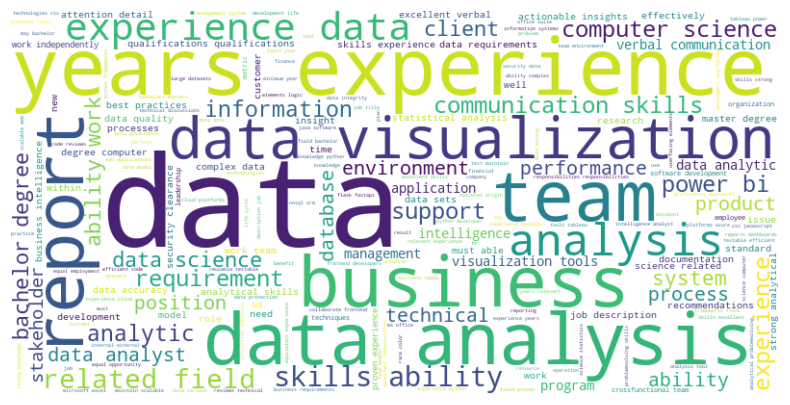

In [36]:
full_job_description = ' '.join(job_descriptions)

# Function to preprocess text (lowercase, remove punctuation)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize using nltk
    words = word_tokenize(text)
    
    return words

# Function to remove stopwords
def remove_stopwords(words):
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]
    
    return filtered_words

# Function to remove verbs using POS tagging
def remove_verbs(words):
    # POS tagging
    tagged_words = pos_tag(words)
    
    # Keep only words that are not verbs (excluding 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ')
    non_verbs = [word for word, tag in tagged_words if not tag.startswith('VB')]
    
    return non_verbs

# Function to calculate word frequency without verbs
def word_frequency(text):
    # Preprocess and tokenize the text
    words = preprocess_text(text)
    
    # Remove stopwords
    words_filtered = remove_stopwords(words)
    
    # Remove verbs
    words_no_verbs = remove_verbs(words_filtered)
    
    # Count word frequencies
    word_counts = Counter(words_no_verbs)
    
    return word_counts

# Function to generate a word cloud
def generate_word_cloud(text):
    # Preprocess and tokenize the text
    words = preprocess_text(text)
    
    # Remove stopwords
    words_filtered = remove_stopwords(words)
    
    # Remove verbs
    words_no_verbs = remove_verbs(words_filtered)
    
    # Join the words back into a single string for the word cloud
    clean_text = ' '.join(words_no_verbs)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No axis for word cloud visualization
    plt.show()

# Get word frequency after removing verbs
word_freq = word_frequency(full_job_description)

# Display the top N most common words
top_n = 20
print(word_freq.most_common(top_n))

generate_word_cloud(full_job_description)

